In [166]:
import cc3d
import numpy as np
from PIL import Image
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [167]:
file_path = "C:\\Users\\ahmm9\\Desktop\\head_segment.tif"
data = np.array(io.imread(file_path))
print(data.shape)
y, z ,x = np.where(data == 1)
print(x.shape)
print(y.shape)
print(z.shape)

(44, 48, 348)
(3265,)
(3265,)
(3265,)


In [168]:
X = np.array([x,y,z])
covMatrix = np.cov(X,bias = True)
eigval, eigvec = np.linalg.eig(covMatrix)
print(eigval)
print(eigvec)
vec = eigvec * np.sqrt(eigval)
print(vec)

[60.86065048 11.9974232   8.34106855]
[[ 0.83885667 -0.50162438  0.21140595]
 [-0.5109137  -0.85954501 -0.0122294 ]
 [-0.1878475   0.09775149  0.97732183]]
[[ 6.54419235 -1.73749123  0.61055959]
 [-3.98580313 -2.97723157 -0.0353196 ]
 [-1.4654591   0.33858473  2.82259421]]


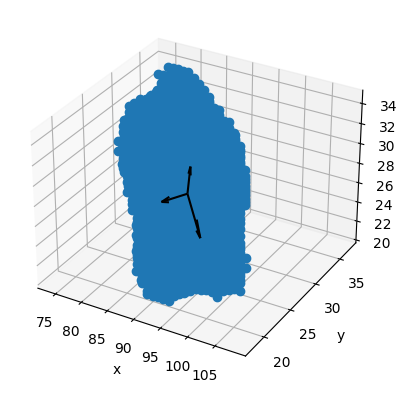

In [169]:
origin = np.mean(X, axis=1)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(x, y, z, 'o')
ax.quiver(*origin, vec[0,:], vec[1,:], vec[2,:], color='k')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

In [170]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

In [195]:
# length of each vector

print(np.sqrt(np.sum((vec)**2, axis=0))) #should give the same result as
print(np.sqrt(eigval)) #because the eigenvectors are unitary


# Given eigenvectors
v1 = np.array([0.83885667, -0.50162438, 0.21140595])
v2 = np.array([-0.5109137, -0.85954501, -0.0122294])
v3 = np.array([-0.1878475, 0.09775149, 0.97732183])

# Normalize eigenvectors
v1_normalized = v1 / np.linalg.norm(v1)
v2_normalized = v2 - np.dot(v1_normalized, v2) * v1_normalized
v2_normalized /= np.linalg.norm(v2_normalized)
v3_normalized = np.cross(v1_normalized, v2_normalized)

# Construct the rotation matrix
R = np.array([v1_normalized, v2_normalized, v3_normalized])
# Example set of points
points = np.array((x,y,z))

# Apply rotation to the points
transformed_points = np.dot(points.T, R)


centroid = np.mean(transformed_points, axis=0)
centralized_points = transformed_points - centroid
n_x = centralized_points.T[0]
n_y = centralized_points.T[1]
n_z = centralized_points.T[2]
print(n_x.shape)

X = np.array([n_x,n_y,n_z])
covMatrix = np.cov(X,bias = True)
eigval, eigvec = np.linalg.eig(covMatrix)
print(eigval)
print(eigvec)
vec = eigvec * np.sqrt(eigval)
print("vec",vec)

[7.80132364 2.88809081 3.46372967]
[7.80132364 2.88809081 3.46372967]
(3265,)
[60.86065048  8.34106855 11.9974232 ]
[[ 0.92942664  0.36717492 -0.03672475]
 [ 0.03672474 -0.19106932 -0.98088929]
 [ 0.36717492 -0.91031593  0.19106932]]
vec [[ 7.25075799  1.0604345  -0.12720459]
 [ 0.28650159 -0.55182555 -3.39753535]
 [ 2.86445035 -2.62907508  0.66181248]]


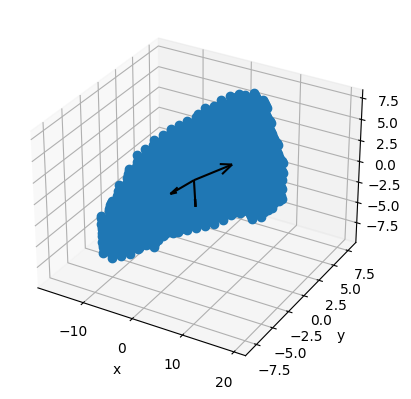

In [194]:
origin = np.mean(centralized_points, axis=0)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(n_x, n_y, n_z, 'o')
ax.quiver(*origin, vec[0,:], vec[1,:], vec[2,:], color='k')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()



In [193]:
print(eigvec[0])
print(eigvec[1])
print(eigvec[2])

[ 0.92942664  0.36717492 -0.03672475]
[ 0.03672474 -0.19106932 -0.98088929]
[ 0.36717492 -0.91031593  0.19106932]
